In [2]:
import requests # Package REQUEST pour Scrapping: Effectue un requete HTTP et Recupère du code HTML brut
from bs4 import BeautifulSoup # pour PARSING (morceler, séquencer) pour extraire des informations spécifiques et non toute la page avec le code HTTML
from wordcloud import WordCloud
import matplotlib.pyplot as plt # pour tracer et visualiser de données sous forme de graphiques
import re  # pour Regex

In [3]:
!pip install -U spacy 
!where python  
!python -m spacy download fr_core_news_sm
import spacy
# Load French tokenizer, tagger, parser and NER
nlp = spacy.load("fr_core_news_sm") 


     --------------------------------------- 12.2/12.2 MB 20.5 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.8.4
    Uninstalling spacy-3.8.4:
      Successfully uninstalled spacy-3.8.4
C:\Users\anala\anaconda3\python.exe
C:\Users\anala\Anconda3\python.exe
C:\Users\anala\AppData\Local\Programs\Python\Python312\python.exe
C:\Users\anala\AppData\Local\Microsoft\WindowsApps\python.exe
     --------------------------------------- 16.3/16.3 MB 23.4 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [4]:
# Extraction de l'article en html
url = "https://www.radiofrance.fr/franceculture/podcasts/superfail/cartels-mexicains-desastre-ecolo-le-proces-de-l-avocat-6723223"
response = requests.get(url)
html_content = response.text


In [6]:
# parser le contenu html
soup = BeautifulSoup(html_content, "html.parser")


In [7]:
#print(soup)


In [8]:
 # Extraire le texte principal (souvent dans les balises <p>)
paragraphs = soup.find_all("p")
article_text = " ".join([p.get_text() for p in paragraphs])

In [9]:
# Phrase où arrêter l'extraction
end_sentence = "on balance de l’éthylène pour le faire murir"


In [10]:
# Découper le texte jusqu'à cette phrase
split_text = re.split(rf"({re.escape(end_sentence)})", article_text, maxsplit=1)

In [11]:
# Garder uniquement la partie avant la phrase cible (et inclure la phrase si nécessaire)
if len(split_text) > 1:
    extracted_text = split_text[0] + split_text[1]  # Inclure la phrase cible
else:
    extracted_text = article_text  # Si la phrase n'est pas trouvée, garder tout


In [12]:
# Vérification du texte extrait
print(extracted_text[:1000])  # Afficher seulement les 1000 premiers caractères pour vérifier

Cartels mexicains, désastre écolo : le procès de l’avocat javascript désactivé Votre expérience sur le site radiofrance.fr risque d’être dégradée.  Publié le samedi 10 juillet 2021 à 13:44  S’il est réputé pour ses bienfaits nutritionnels et cosmétiques, le bilan écologique et social de la culture de l'avocat est particulièrement négatif. Entre consommation excessive en eau, recours aux pesticides et crime organisé au Mexique, Superfail revient sur les méfaits de ce fruit à la mode.  L’avocat est devenu en l’espace d’une dizaine d’années, un aliment incontournable en Europe : entre 2016 et 2018, la consommation européenne d’avocats a ainsi augmenté de 65%. Pourtant, derrière cet aliment médiatisé par les influenceurs et plébiscité par les végétariens pour ses apports nutritifs, se cache des conséquences dramatiques à la fois sur l’environnement et sur une partie de la population mexicaine.  Pour en apprendre plus sur cet aliment, nous nous sommes tournés vers Bruno Parmentier, il est c

In [13]:
print(extracted_text)

Cartels mexicains, désastre écolo : le procès de l’avocat javascript désactivé Votre expérience sur le site radiofrance.fr risque d’être dégradée.  Publié le samedi 10 juillet 2021 à 13:44  S’il est réputé pour ses bienfaits nutritionnels et cosmétiques, le bilan écologique et social de la culture de l'avocat est particulièrement négatif. Entre consommation excessive en eau, recours aux pesticides et crime organisé au Mexique, Superfail revient sur les méfaits de ce fruit à la mode.  L’avocat est devenu en l’espace d’une dizaine d’années, un aliment incontournable en Europe : entre 2016 et 2018, la consommation européenne d’avocats a ainsi augmenté de 65%. Pourtant, derrière cet aliment médiatisé par les influenceurs et plébiscité par les végétariens pour ses apports nutritifs, se cache des conséquences dramatiques à la fois sur l’environnement et sur une partie de la population mexicaine.  Pour en apprendre plus sur cet aliment, nous nous sommes tournés vers Bruno Parmentier, il est c

In [14]:
doc = nlp(extracted_text)

In [15]:
# Stopwords par défaut de spaCy (ex : "de", "le", "est", "dans" etc.)
stopwords = nlp.Defaults.stop_words

In [16]:
print(stopwords)

{'doivent', 'tienne', "t'", 'quant-à-soi', 'tente', 'pu', 'differentes', 'unes', 'fais', 'néanmoins', 'dite', 'ceci', 'siens', 'vas', 'parler', 'quels', 'sauf', 'premier', 'il', 'du', 'sous', 'tres', 'trente', 'as', 'quoique', 'ceux-là', 'notre', 'sera', 'pourquoi', 'dessous', 'feront', 'ouvert', 'depuis', 'auxquels', 'aux', 'restent', 'malgre', 'pour', 'hi', 'préalable', 'première', 'un', 't’', 'troisième', 'celle', 'dix-huit', 'ceux', 'lequel', 'effet', 'proche', 'tu', 'etre', 'ce', 'tiens', 'où', 'l’', 'vos', 'revoila', 'allaient', "quelqu'un", 'quelle', 'lui', 'lesquelles', 'ne', 'toi-meme', 'differente', 'semble', 'parfois', 'autrui', 'differents', 'vais', 'six', 'anterieur', 'dire', 'selon', 'duquel', 'septième', 'derrière', 'deuxième', 'peu', 'tien', 'toujours', 'plutot', 'ces', 'ça', 'lesquels', 'dix-neuf', 'laquelle', "m'", 'étais', 'deja', 'faisant', 'cinquantième', 'eh', 'faisaient', 'peut', 'cinquantaine', 'seraient', 'être', 'mes', 'celles-là', 'spécifique', 'm’', 'elles-m

In [17]:

# stopwords.add("min") # Ajoute "min" à la liste des stopwords _ pour ajouter qu'un seul un mot 

In [106]:
words_to_add = ["bruno", "consultant", "soudain", "superfail", "min", "javascript", "écouter", "youtube", "publié", "ancien", "directeur", "agronomie", "site", "intitulée", "radiofrance.fr", "faut", "faire", "salade", "tomate", "concombre", "fr", ".fr", "samedi", "désactivé", "expérience", "blog", "chaîne", "anime", "angers", "parmentier", "jusqu", "juillet", "aujourd'hui", "aujourd", "hui", "actuellement", "nord", "sud", "école", "nous", "sommes", "mis", "particulièrement"]
for word in words_to_add: 
    nlp.Defaults.stop_words.update(words_to_add)   


In [108]:
# Stopwords à **conserver** car pertinents dans ce contexte écologique et social
stopwords_a_garder = {"avocat", "cartel", "écologique", "social", "environnement", "crime", "déforestation", "exploitation", "pesticides","michoacán", "nappes phréatiques" "délogent", "assèchement"}


In [110]:
# Filtrer les mots inutiles, sauf ceux qu'on veut garder
mots_filtres = [
    token.text.lower()
    for token in doc
    if token.text.lower() not in stopwords or token.text.lower() in stopwords_a_garder
    if not token.is_punct and not token.is_space
]

In [112]:
 # Convertir la liste en une seule chaîne de texte
texte_filtré = " ".join(mots_filtres)


In [114]:
print(texte_filtré)

cartels mexicains désastre écolo procès avocat risque dégradée 10 2021 13:44 réputé bienfaits nutritionnels cosmétiques bilan écologique social culture avocat négatif consommation excessive eau recours pesticides crime organisé mexique revient méfaits fruit mode avocat devenu espace dizaine années aliment incontournable europe 2016 2018 consommation européenne avocats augmenté 65 pourtant aliment médiatisé influenceurs plébiscité végétariens apports nutritifs cache conséquences dramatiques fois environnement partie population mexicaine apprendre aliment tournés spécialisé questions agricoles alimentaires aujourd’hui nourrir manger agriculture demain avocatier arbre cultivé historiquement régions climats tropicaux humides mexique pays producteur mondial décennie avocat devenu aliment prisé régions monde bien éloignées mexique europe amérique demande énorme particulier france situer 3 kilos famille avocat poussait spécialisé questions agricoles alimentaires constatant explosion demande o

In [116]:
# Générer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(texte_filtré)

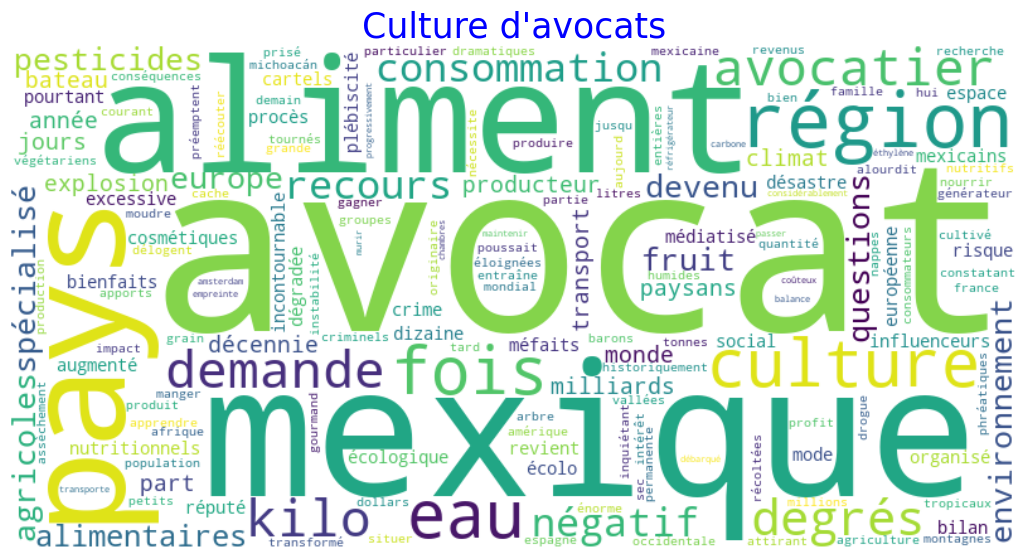

In [117]:
  # Affichage du nuage de mots
plt.figure(figsize=(13,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Culture d'avocats", fontsize=25, color='blue')
plt.show() 
